In [9]:
import numpy as np
%matplotlib widget
from matplotlib import pyplot as plt
from tqdm import tqdm
import torch as tc
# import gen_comp_plot as gcp
from p_power import *
# from project.blueprints.pyhton.msd_Dmom import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
A = tc.complex(tc.Tensor([[2, 1], [1, 2]]), tc.zeros(2, 2))
U = tc.complex(tc.Tensor([[1, 1], [1, -1]]), tc.zeros(2, 2)) / np.sqrt(2)
y = tc.complex(
    *[tc.normal(mean=tc.zeros((4,2)), std=1) for _ in range(2)]
).to(device)

print(y)

tensor([[-0.1799+0.0163j,  1.7119-0.6210j],
        [ 0.3542-0.6733j,  1.2850+0.3541j],
        [ 0.5396-1.2690j, -1.5115+1.1107j],
        [ 1.5496+0.3248j, -0.6430-1.7008j]])


In [58]:

def lamperti(p): 
    thetas = tc.rand(1, 2) * 2 * np.pi
    guesses = tc.zeros(24, 2, 4, dtype=tc.cfloat)
    # import pdb; pdb.set_trace()
    for i in range(4):
        
        guesses[i, 0, i] = tc.exp( 1j * thetas[0,0])
        guesses[i + 4, 1, i] = tc.exp(1j * thetas[0,1])
        guesses[(4 * (i + 2)):(4 * (i + 3)), 0, i] = tc.exp(1j * thetas[0,0])
        
        for k in range(4):
            guesses[(4 * (i + 2)) + k, 1, k] = tc.exp(1j * thetas[0,1]) 
            if k == i:  
                guesses[(4 * (i + 2)) + k, :, :] *= (.5 ** (1/p))
                
    return guesses



In [97]:
p = 1.5
res, vect = p_power(y, p, s_max=100)
# print(res)

res, vect = p_power(y, p, v_init=vect, s_max=100)
matrix= lamperti(p) @ y


final, _ = p_power(matrix, p, s_max=1000)

# print(final.shape)
final_res = tc.max(final)
print(final_res)
print(res)

tensor(3.3475)
tensor([[[4.4139]]])


In [24]:
for i in range(4):
    print(i)
    

0
1
2
3


In [ ]:

ps = np.arange(1, 5, 0.1)
        
norms = [p_power(y, p, s_max=100)[0] for p in tqdm(ps)]
norms = [n if n==0 else n.item() for n in norms]
figure1 = plt.figure(1)
plt.plot(ps, norms)
plt.show()
qs = 1 - 1 / (1 - ps)
# plt.plot(ps, np.maximum(2**(1/ps), 2**(1/ps)), linestyle='--', linewidth=2)
# plt.show()

  0%|          | 0/40 [00:00<?, ?it/s]c:\Users\jackg\OneDrive - UCB-O365\Documents\!prjs\smoooooothOperatorrr\project\blueprints\pyhton\max_sim_diag.py:27: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ..\aten\src\ATen\native\Copy.cpp:300.)
  converged = tc.zeros(s_max_diag, 1, 1, 1, dtype=tc.cfloat).to(device).bool()
100%|██████████| 40/40 [00:38<00:00,  1.05it/s]


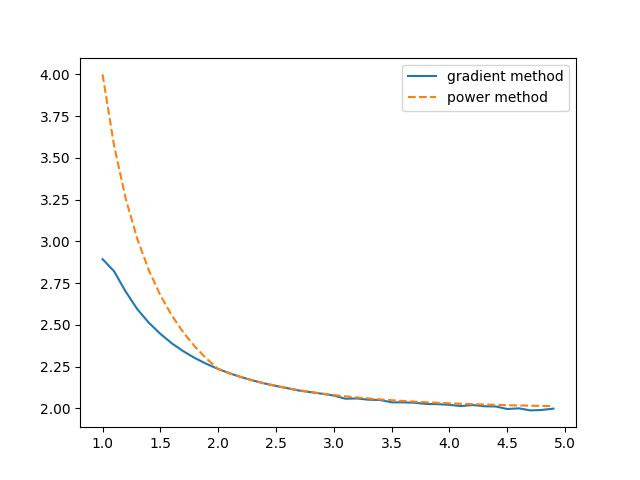

In [ ]:
figure2 = plt.figure()
ps = np.arange(1, 5, 0.1)
norms = [max_sim_diag(A, U, p) for p in tqdm(ps)]
b, a = zip(*norms)
b = [x.item() for x in b]
a = [x.item() for x in a]
plt.plot(ps, b, label='gradient method')
plt.plot(ps, a, label='power method', linestyle='--')
plt.legend()
# qs = 1 - 1 / (1 - ps)
# plt.plot(ps, np.maximum(2**(1/ps), 2**(1/ps)), linestyle='--', linewidth=2)
plt.show()

In [ ]:
max_sim_diag(A, U, 1.1)

(tensor(2.8147), tensor([[[3.5722]]]))

In [ ]:
tc.linalg.matrix_norm(y, ord=2)

tensor(27.3326)

In [ ]:
dual(y, p=2, dim=1)**2

tensor([[ 0.0139+0.0202j, -0.0209+0.0303j,  0.0060-0.0022j,  ...,
          0.0024-0.0214j,  0.0066-0.0062j, -0.0080+0.0244j],
        [ 0.0073-0.0058j,  0.0027-0.0006j, -0.0044-0.0098j,  ...,
          0.0080-0.0021j, -0.0147-0.0071j, -0.0043-0.0146j],
        [ 0.0007-0.0003j,  0.0015-0.0131j, -0.0047+0.0015j,  ...,
         -0.0015-0.0033j,  0.0011+0.0150j, -0.0010+0.0134j],
        ...,
        [ 0.0008-0.0028j, -0.0023+0.0016j,  0.0039+0.0065j,  ...,
          0.0062-0.0034j,  0.0096+0.0228j, -0.0063-0.0130j],
        [ 0.0002+0.0058j, -0.0015+0.0018j,  0.0006-0.0004j,  ...,
         -0.0109-0.0042j,  0.0027+0.0090j, -0.0052+0.0216j],
        [ 0.0033-0.0133j,  0.0157-0.0219j,  0.0048+0.0005j,  ...,
         -0.0058+0.0014j,  0.0057-0.0025j,  0.0001+0.0026j]])

In [ ]:
range(2)

range(0, 2)

In [ ]:
dim=1
val, ind = y.abs().max(dim=dim, keepdim=True)
range_shape = [1 for _ in range(len(y.shape))]
range_shape[dim] = -1
y_dual = 0 * y
y_dual[tc.arange(y.shape[dim]).reshape(range_shape) == ind] = val.sgn().flatten()
#y_dual[tc.arange(y.shape[dim]).reshape(range_shape) == ind] = tc.sgn(val)

RuntimeError: Index put requires the source and destination dtypes match, got ComplexFloat for the destination and Float for the source.

In [ ]:
y_dual

tensor([[0., 0., 1.],
        [1., -0., -0.]])

In [ ]:
B = tc.randint(0, 4, size=(1, 4, 2, 2))

In [ ]:
B.transpose(1, 2).flatten(2, 3)

tensor([[[1, 3, 2, 3, 2, 1, 2, 2],
         [1, 3, 3, 2, 1, 0, 3, 2]]])

In [ ]:
B[0,1]

tensor([[2, 3],
        [3, 2]])

In [ ]:
1 / tc.Tensor([np.inf])

tensor([0.])

In [ ]:
gcp.p_plot(kind='c', dims=[12], dp=.1, p_max=25, s_max= 25)

KeyboardInterrupt: 